# Eksploracja danych - German credit data

Podmiotem eksploracji danych są dane pochodzące z https://www.apispreadsheets.com/datasets/127, które służą do określenia czy dana osoba jest 'dobrym' lub 'złym' kredytobiorcą.

In [9]:
# Import potrzebnych bibliotek do eksploracji danych, ustawienie ziarna generatora oraz wczytanie danych

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pandas as pd 
import scipy as sc
import warnings as wr
np.random.seed(23)


gcd = pd.read_csv('german_credit_data_dataset.csv', delimiter=',')
attr_gcd = pd.read_csv('attributes_german_credit_data.csv', delimiter=',')

## Zapoznanie się z danymi

In [10]:
# Wyświetlenie ramki danych
gcd

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1,A191,A201,1
996,A11,30,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1,A192,A201,1
997,A14,12,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1,A191,A201,1
998,A11,45,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1,A192,A201,2


W ramce danych znajduje się 1000 wierszy oraz 21 kolumn. 

In [11]:
# Sprawdzenie kolumn, typów zmiennych i ich znaczenia
pd.set_option('display.max_colwidth', None)
attr_gcd

,name,type,description
0,checking_account_status,string,"Status of existing checking account (A11: < 0 DM, A12: 0 <= x < 200 DM, A13 : >= 200 DM / salary assignments for at least 1 year, A14 : no checking account)"
1,duration,integer,Duration in month
2,credit_history,string,"A30: no credits taken/ all credits paid back duly, A31: all credits at this bank paid back duly, A32: existing credits paid back duly till now, A33: delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank)"
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others)"
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62 : 100 <= x < 500 DM, A63 : 500 <= x < 1000 DM, A64 : >= 1000 DM, A65 : unknown/ no savings account"
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x < 4 years, A74 : 4 <= x < 7 years, A75 : .. >= 7 years"
7,installment_rate,float,Installment Rate in percentage of disposable income
8,personal,string,"Personal Marital Status and Sex (A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single)"
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guarantor"


W naszym zbiorze danych znajduje się aż 13 zmiennych typu 'string'. Jednakże, są to zmienne dyskretne, więc będziemy je mogli zamienić za pomocą encodingu.

In [12]:
# Utrwalenie informacji o zbiorze danych
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [13]:
# Kontrola Null'i/NaN'ów
gcd.isnull().sum()

checking_account_status    0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
present_employment         0
installment_rate           0
personal                   0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
customer_type              0
dtype: int64

Wygląda na to, że nie ma braków danych w naszym zbiorze danych. Jednak rzeczywistość jest zupełnie inna.

**UWAGA**: Brakujące wartości dla zmiennych nominalnych zostały oznaczone '**?**' a dla zmiennych numerycznych **-100000**!

In [14]:
# Szukanie braków danych

def searchNull(df):
    
    out = []
    
    for column in df:
        
        if df[column].dtype == 'object':
            count = df[column].loc[df[column] == '?'].count()
            out.append([df[column].name,count])
        else:
            count = df[column].loc[df[column] == -100000].count()
            out.append([df[column].name,count])
            
    out = pd.DataFrame(data=out,columns=['Column Names', "Number of Nulls"])
    
    return out

searchNull(gcd)

,Column Names,Number of Nulls
0,checking_account_status,0
1,duration,0
2,credit_history,0
3,purpose,0
4,credit_amount,0
5,savings,0
6,present_employment,0
7,installment_rate,0
8,personal,0
9,other_debtors,0


Wygląda na to, że w naszym zbiorze danych nie ma żadnych brakujących wartości (szczęśliwie).

## Podział zbioru danych na próbkę treningową i próbkę testową

In [15]:
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 10,'display.max_columns',15)

# Podział warstwowy według customer_type
gcd_train, gcd_test = train_test_split(gcd, test_size=0.3, random_state=42, stratify=gcd['customer_type'])
gcd_train_train, gcd_train_test = train_test_split(gcd_train, test_size=0.3, random_state=42, stratify=gcd_train['customer_type'])

# gcd_train - próbka treningowa dla zespołu budującego
# gcd_test - próbka testowa dla zespołu walidacyjnego
# gcd_train_train - próbka treningowa próbki treningowej zespołu budującego
# gcd_train_test - próbka testowa próbki treningowej zespołu budującego

## Eksploracja próbki treningowej

Wiemy, że próbka testowa nie ma żadnego braku danych. Wykonujemy encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

def encoding(df):
    le = LabelEncoder()
    for column in df:    
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])               
    
    return 

In [23]:
encoding(gcd_train_train) # ten warning jest nic nie znaczący

<ipython-input-22-20af40c9a68a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])


In [10]:
gcd_train_train.describe()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,...,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000
mean,1.634694,20.608163,2.573469,3.169388,3178.630612,1.110204,2.461224,...,0.940816,1.444898,1.926531,1.173469,0.42449,0.030612,1.300000
std,1.254530,11.727371,1.109409,2.751070,2663.048472,1.544201,1.199662,...,0.537516,0.577372,0.622277,0.379040,0.49477,0.172441,0.458726
min,0.000000,4.000000,0.000000,0.000000,338.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000
25%,0.000000,12.000000,2.000000,1.000000,1346.250000,0.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,0.00000,0.000000,1.000000
50%,1.000000,18.000000,2.000000,3.000000,2324.000000,0.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,0.00000,0.000000,1.000000
75%,3.000000,24.000000,4.000000,4.000000,3913.750000,2.000000,4.000000,...,1.000000,2.000000,2.000000,1.000000,1.00000,0.000000,2.000000
max,3.000000,60.000000,4.000000,9.000000,15945.000000,4.000000,4.000000,...,2.000000,4.000000,3.000000,2.000000,1.00000,1.000000,2.000000


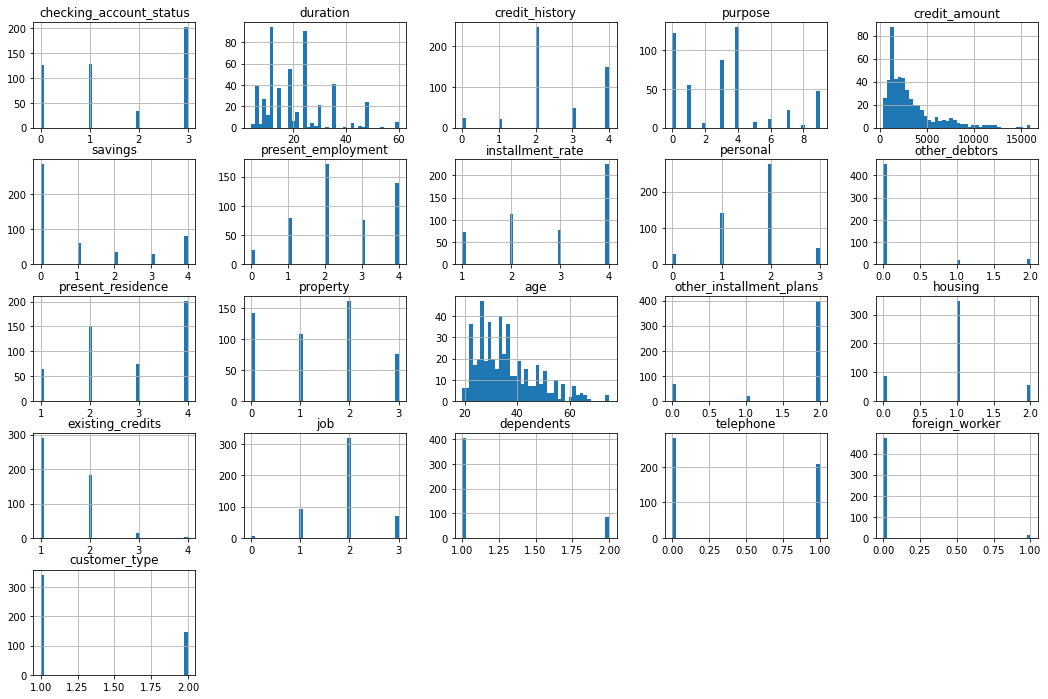

In [11]:
# Sprawdzenie rozkładów zmiennych numerycznych
gcd_train_train.hist(bins = 40, figsize=(18, 12))
plt.show()

Zauważmy, że potrzebna będzie transformacja logarytmiczna kolumn: *credit_amount*, *age* i być może *duration*.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

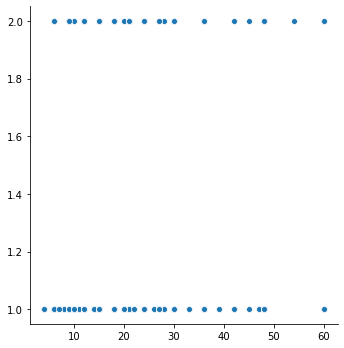

In [60]:
sns.relplot(data = gcd_train_train, y ="customer_type", x =gcd_train_train['duration'])
sns.relplot(data = gcd_train_train, y ="customer_type", x =gcd_train_train['credit_amount'])
sns.relplot(data = gcd_train_train, y ="customer_type", x =gcd_train_train['age'])

plt.show()

Przy kredytach krótszych niż około 12msc, więcej klientów jest kwalifikowanych jak złych. 
Przy wieku większym niż około 45 jest więcej klientów kwalifikowanych jako dobrych. 

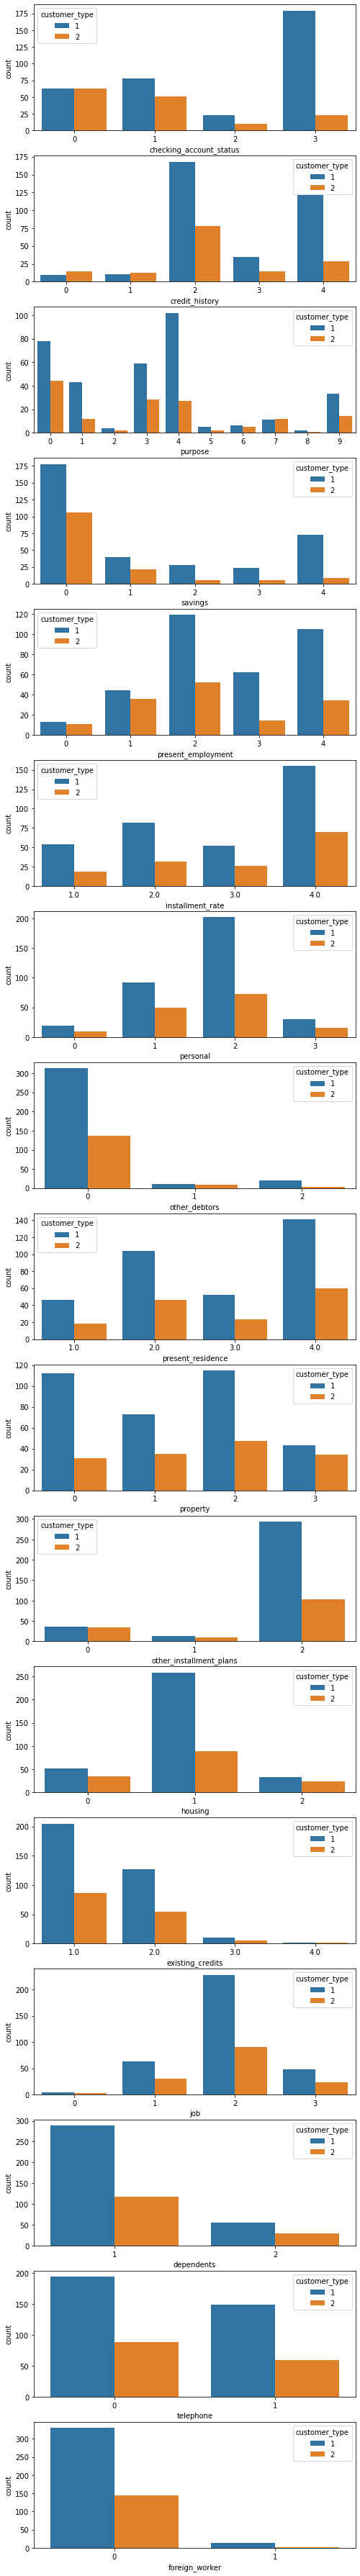

In [48]:
fig, axs = plt.subplots(nrows=17,figsize=(8, 65))
i=0
for column in gcd_train_train:
    if (column!='customer_type')and column!='age'and column!='duration'and column!='credit_amount':
        sns.countplot(data = gcd_train_train ,x= column, hue='customer_type', ax=axs[i])
        i=i+1
plt.show()

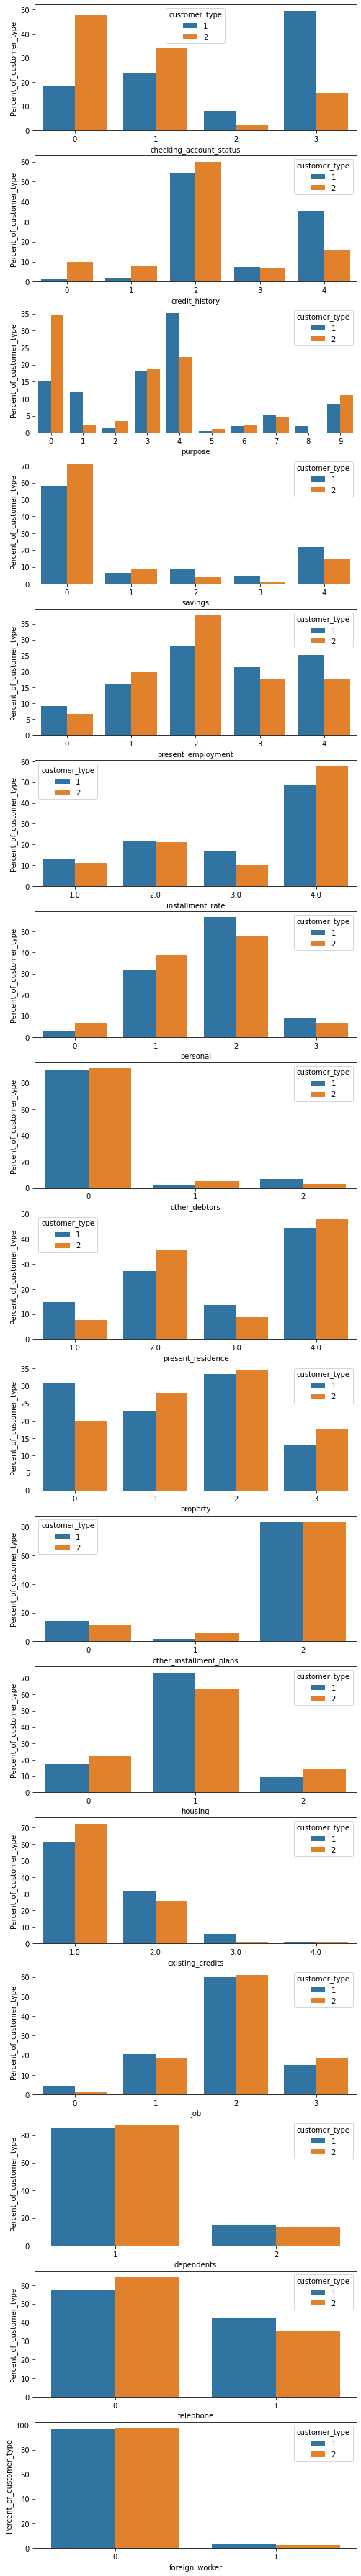

In [51]:
fig, axs = plt.subplots(nrows=17,figsize=(8, 65))
i=0
for column in gcd_train_train:
    if (column!='customer_type')and column!='age'and column!='duration'and column!='credit_amount':
        new_df = gcd_test.groupby(['customer_type'])[column].value_counts(normalize=True)
        new_df = new_df.mul(100).rename('Percent_of_customer_type').reset_index()
        new_df
        sns.barplot(x=column, y='Percent_of_customer_type', hue='customer_type', data=new_df,ax=axs[i])
    
        i=i+1
plt.show()

Przy kolumnach *checking_account_status* , *credit_history*, *purpose*, *savings*, *other_debtors* możemy zauważyć dysproporcję między ilością klientów dobrych, a złych, w zależności od wartości kolumny. Oznacza to, że przy konkretne wartości w tych kolumnach wpływają na rodzaj klienta.

In [66]:
#Funkcja do sprawdzania korelacji
def corrPlot(df):
    
    num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]

    plt.figure(figsize=(15, 10))
    heatmap = sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
    plt.show()
    
    return 

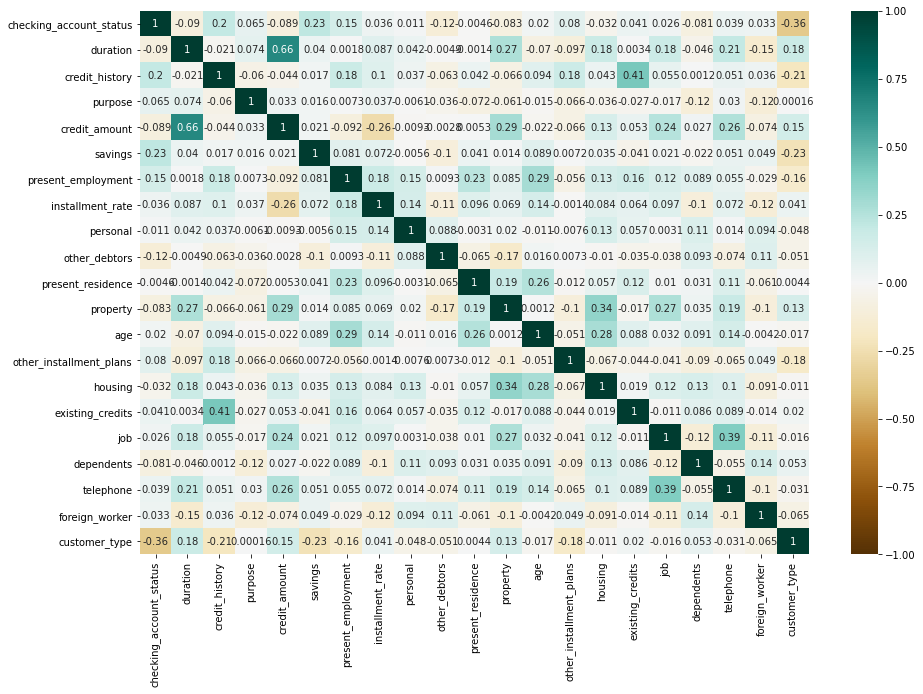

In [15]:
corrPlot(gcd_train_train)

Można dojść do wniosku, że zmienne numeryczne nie są ze sobą znacznie skorelowane - ewentualnie moglibyśmy się zastanowić nad korelacją między zmiennymi *duration* i *credit_amount*, jednak wydaje się, że można by było zostawić obie zmienne w swoim modelu.

Sprawdźmy rozkłady zmiennych *duration*, *credit_amount*, *age* po transformacji:

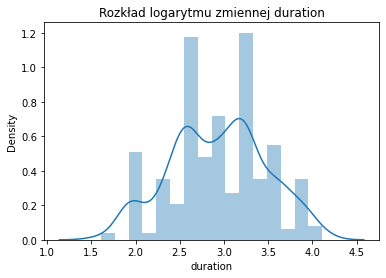

In [16]:
wr.filterwarnings("ignore")

gcd_log_dur = sns.distplot(np.log1p(gcd_train_train['duration']))
gcd_log_dur.set_title('Rozkład logarytmu zmiennej duration')

plt.show()

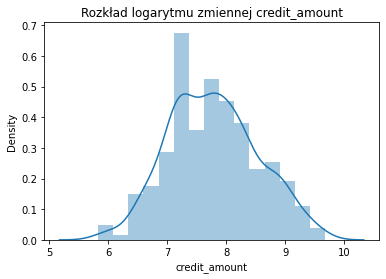

In [17]:
gcd_log_cre = sns.distplot(np.log1p(gcd_train_train['credit_amount']))
gcd_log_cre.set_title('Rozkład logarytmu zmiennej credit_amount')

plt.show()

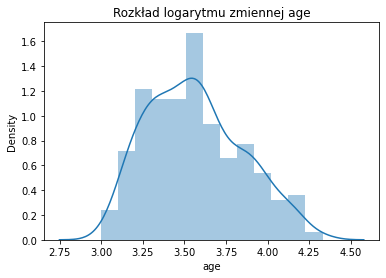

In [18]:
gcd_log_age = sns.distplot(np.log1p(gcd_train_train['age']))
gcd_log_age.set_title('Rozkład logarytmu zmiennej age')

plt.show()

Nie są to idealne rozkłady normalne, ale wyglądają one już zdecydowanie lepiej.

## Eksploracja próbki testowej

Zweryfikujmy nasze założenia na próbce testowej.

In [19]:
encoding(gcd_train_test)

In [20]:
gcd_train_test.describe()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,...,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,1.442857,21.142857,2.485714,2.709524,3252.771429,1.076190,2.290476,...,0.909524,1.304762,1.861905,1.123810,0.357143,0.061905,1.300000
std,1.260011,12.515582,1.036319,2.454642,2708.177949,1.620415,1.180546,...,0.504909,0.491532,0.659836,0.330151,0.480302,0.241558,0.459353
min,0.000000,4.000000,0.000000,0.000000,339.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.000000,2.000000,1.000000,1375.750000,0.000000,1.250000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,18.000000,2.000000,2.000000,2249.000000,0.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,26.250000,4.000000,3.000000,4382.500000,2.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,3.000000,60.000000,4.000000,8.000000,14179.000000,4.000000,4.000000,...,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000


Możemy zauważyć, że dane mają podobny rozkład.

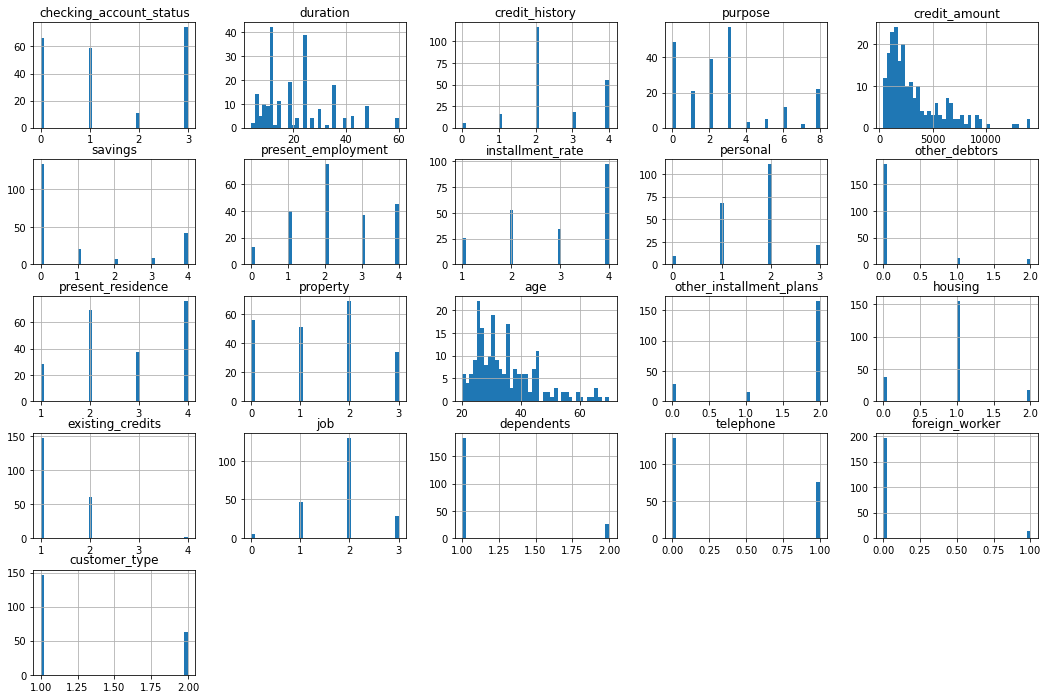

In [21]:
gcd_train_test.hist(bins = 40, figsize=(18, 12))
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

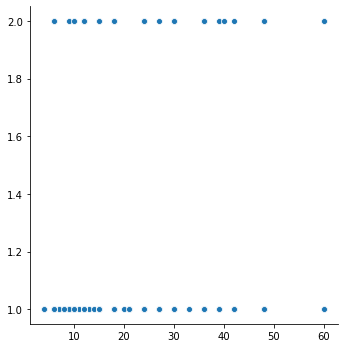

In [59]:
sns.relplot(data = gcd_train_test, y ="customer_type", x =gcd_train_test['duration'])
sns.relplot(data = gcd_train_test, y ="customer_type", x =gcd_train_test['credit_amount'])
sns.relplot(data = gcd_train_test, y ="customer_type", x =gcd_train_test['age'])
plt.show()

Nasze założenia się sprawdzają.

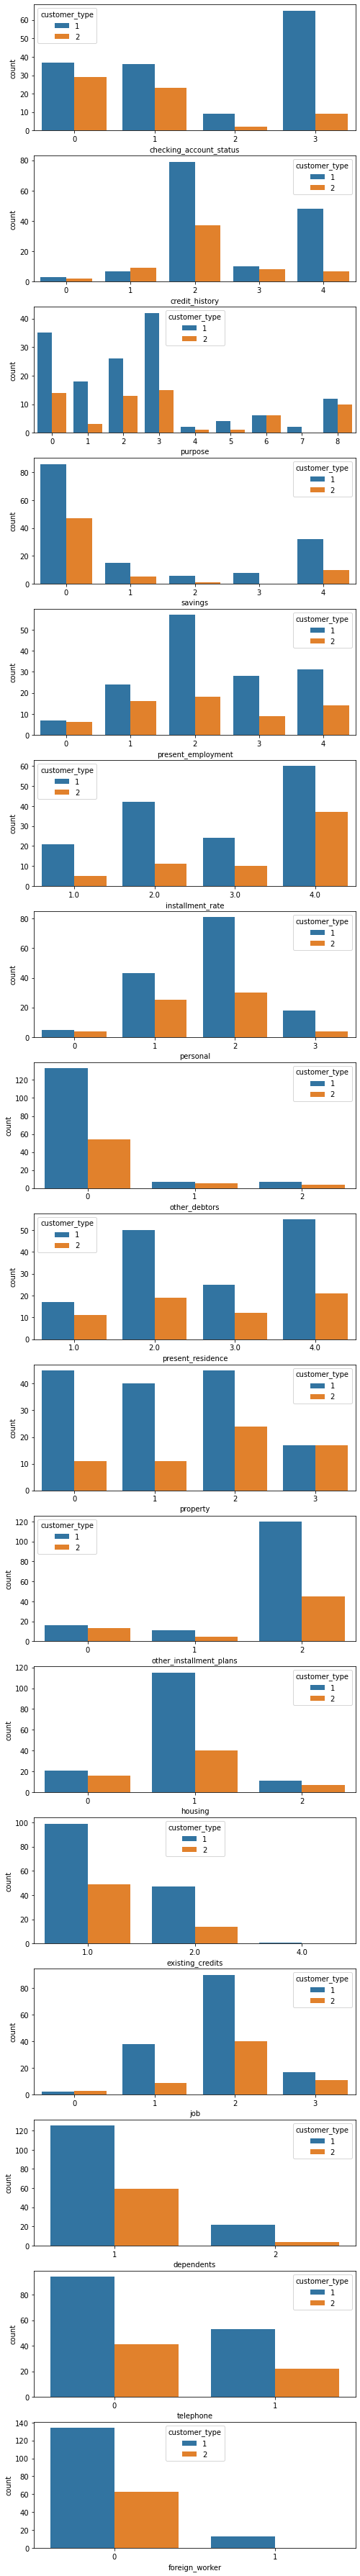

In [23]:
fig, axs = plt.subplots(nrows=17,figsize=(8, 65))
i=0
for column in gcd_train_test:
    if (column!='customer_type')and column!='age'and column!='duration'and column!='credit_amount':
        sns.countplot(data = gcd_train_test ,x= column, hue='customer_type', ax=axs[i])
        i=i+1
plt.show()

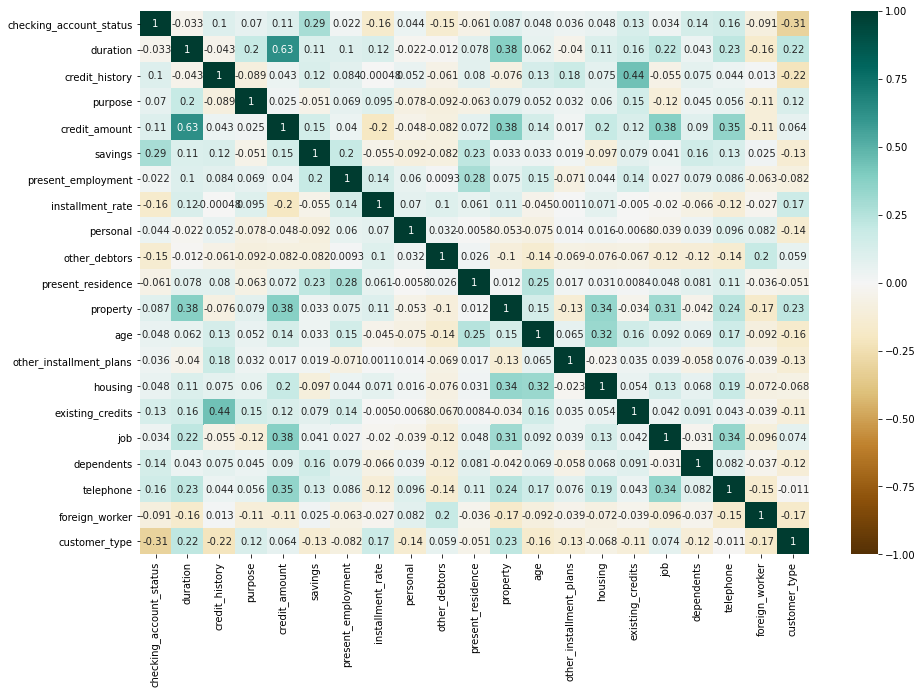

In [24]:
corrPlot(gcd_train_test)

Korelacje między zmiennymi są podobne do danych treningowych.

## Walidacja


Sprawdźmy czy wnioski i działania przeprowadzone na danych zespołu budującego znajdą swoje zastosowanie na danych przeznaczonych do walidacji. W całym zestawie danych nie występują braki, zatem w szczególności nie pojawia się w danych walidacyjnych. Przejdźmy zatem do encodingu. 

In [25]:
encoding(gcd_test)

In [27]:
gcd_test.describe()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,...,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.576667,21.216667,2.540000,3.383333,3435.490000,1.116667,2.323333,...,0.923333,1.416667,1.896667,1.146667,0.403333,0.030000,1.300000
std,1.258067,12.294453,1.073425,2.675866,3139.323895,1.614024,1.237157,...,0.540149,0.625320,0.698294,0.354364,0.491386,0.170872,0.459023
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.000000,2.000000,1.000000,1387.500000,0.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,18.000000,2.000000,3.000000,2331.000000,0.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.000000,4.000000,3962.250000,2.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,...,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000


Przy encodingu, sprawdziłyśmy, czy przypadkiem niektóre kolumny nie reprezentują pewnej hierarchii, a co za tym idzie wymagają ręcznego ustawienia kolejności przypisań, jako że domyślna kolejność jest po prostu alfabetyczna. Okazało się, że takimi kolumnami są *checking_account_status*, *credit_history*, *savings*, *present_employment* oraz *job*, jednak szczęśliwie z opisu wynika, że ich wartości nawet w kolejności alfabetycznej swoją hierarchię (np. wartości DM w kolejności rosnącej) zachowują, więc nie było tu potrzeby wprowadzać zmian.

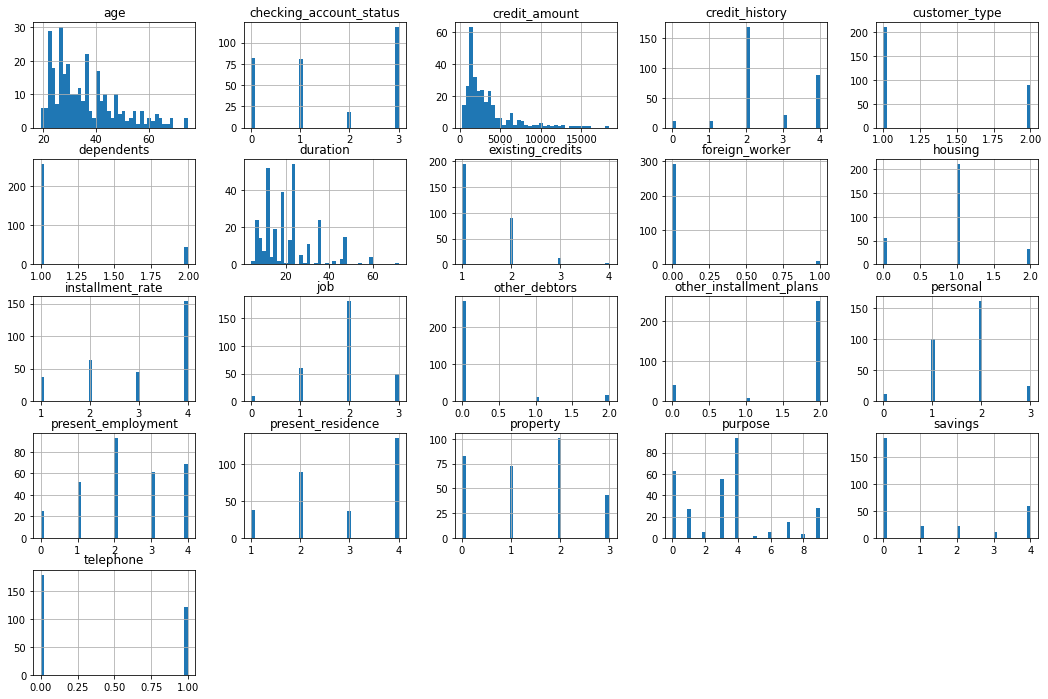

In [29]:
# Sprawdzenie rozkładów zmiennych numerycznych
gcd_test.hist(bins = 40, figsize=(18, 12))
plt.show()

Zmienne *age*, *credit_amount* i *duration* są zimennymi ciągłymi - warto więc zwrócić uwagę czy nie występują outliery. Histogramy tych zmiennych wskazują, że outliery nie występują, a rzadkie występowanie większych wartości uznajemy za zachowanie normalne dla tego typu rozkładu.

Należy jednak logarytmicznie przetransformować powyższe zmienne w celu normalizacji.

Kod do wykresów *relplot* oraz *catplot* zależności zmiennych numerycznych do *customer_type* się nie kompilował, zatem użyłyśmy innej funkcji.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

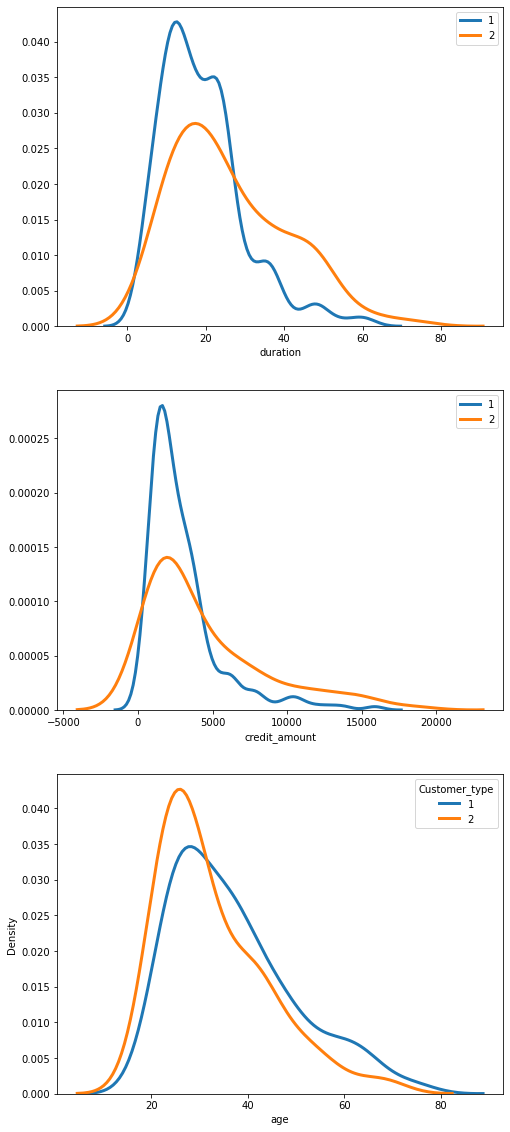

In [106]:
good = gcd_test[gcd_test['customer_type'] == 1]
bad = gcd_test[gcd_test['customer_type'] == 2]
columns = ['duration', 'credit_amount', 'age']

fig, axs = plt.subplots(nrows=3,figsize=(8, 20))
i=0
for column in columns:
    
    sns.distplot(good[column], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 1, ax =axs[i])
    sns.distplot(bad[column], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 2,ax =axs[i])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend( title = 'Customer_type')
    i =i+1
plt.show

Użyłyśmy wykresu gęstości zmiennych, ponieważ naszym zdaniem jest znacznie bardziej przejrzysty i łatwiejszy do wyciągania wniosków. Wnioskowanie w próbce treningowej odbiega od próbki walidacyjnej. Większe zagęszczenie złych klientów obserwujemy przy kredytach dłuższych niż 30 miesięcy. W wieku większym niż 30 jest więcej klientów kwalifikowanych jako dobrych.

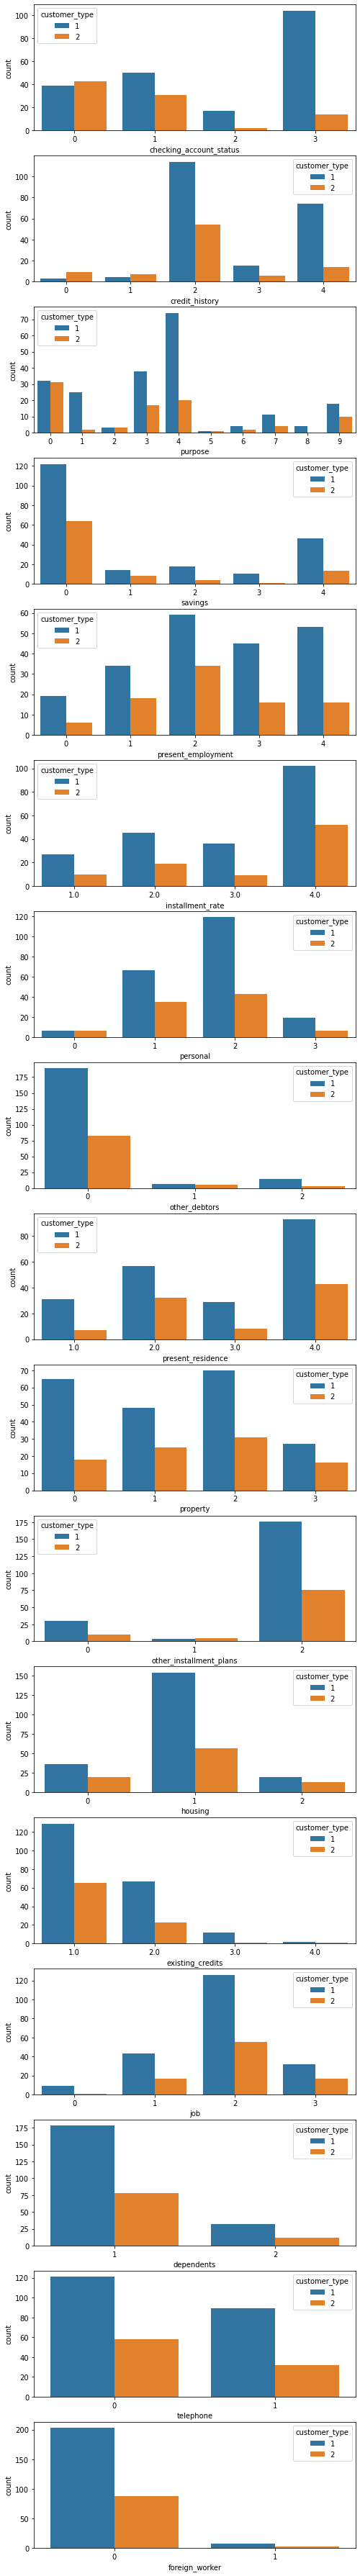

In [56]:
fig, axs = plt.subplots(nrows=17,figsize=(8, 65))
i=0
for column in gcd_test:
    if (column!='customer_type')and column!='age'and column!='duration'and column!='credit_amount':
        sns.countplot(data = gcd_test ,x= column, hue='customer_type', ax=axs[i])
        i=i+1
plt.show()

Rozkład zależności pomiędzy ilością dobrych i złych kredytobiorców wygląda podobnie do tego w próbce treningowej, pojawiają się drobne rozbieżności. W celu innego spojrzenia na zależność zmiennej i jej kategorii do typu klienta, wprowadziłyśmy wykres przedstawiający udział procentowy klientów w danej kategorii do klientów danego typu w sumie.

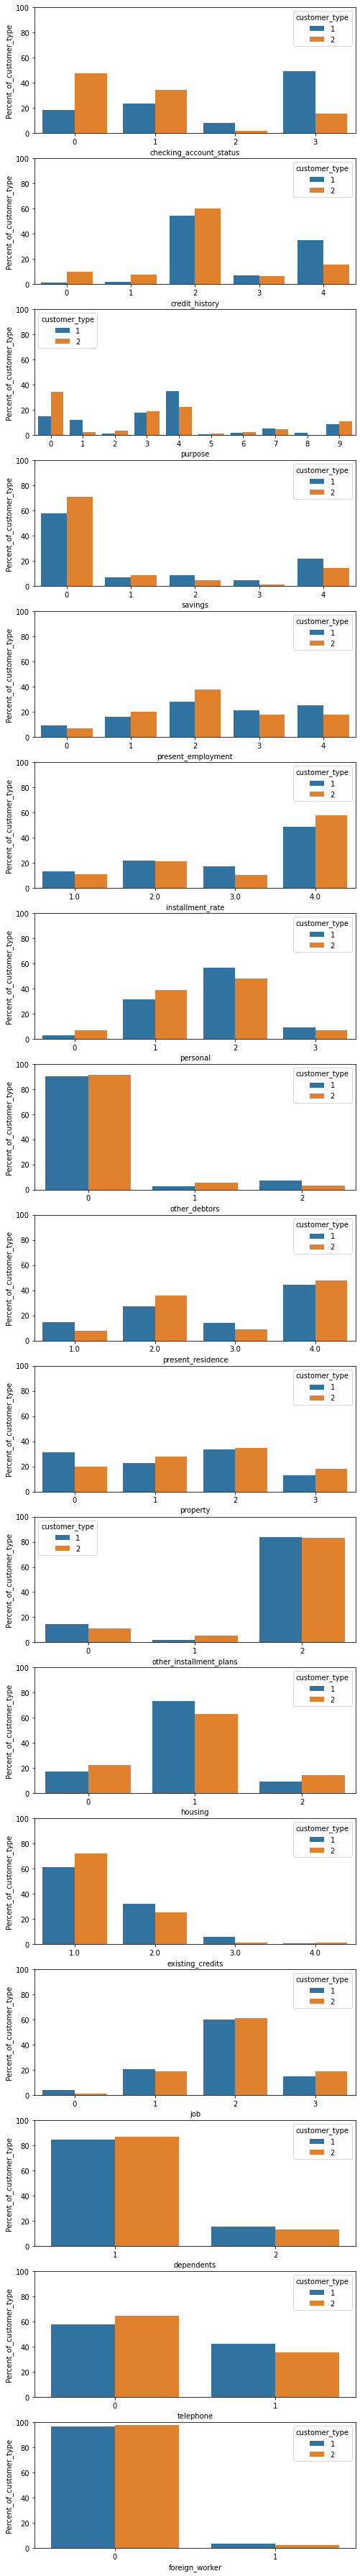

In [57]:
fig, axs = plt.subplots(nrows=17,figsize=(8, 65))
i=0
for column in gcd_test:
    if (column!='customer_type')and column!='age'and column!='duration'and column!='credit_amount':
        new_df = gcd_test.groupby(['customer_type'])[column].value_counts(normalize=True)
        new_df = new_df.mul(100).rename('Percent_of_customer_type').reset_index()
        new_df
        sns.barplot(x=column, y='Percent_of_customer_type', hue='customer_type', data=new_df,ax=axs[i])
        i=i+1
plt.setp(axs,ylim=(0, 100))
plt.show()

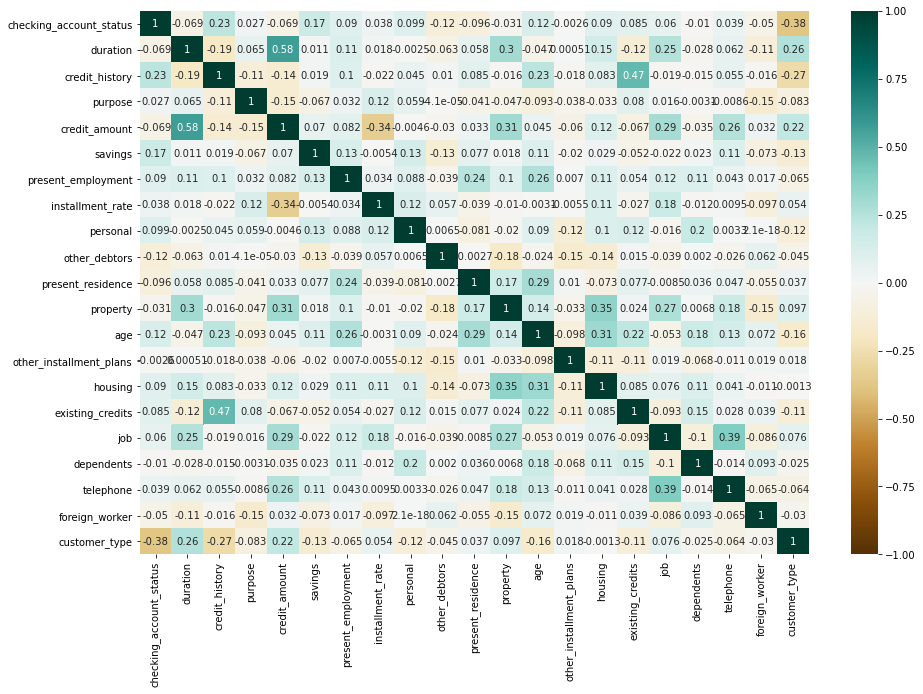

In [67]:
corrPlot(gcd_test)

Również dochodzimy do wniosku, że zmienne numeryczne nie są ze sobą znacznie skorelowane. Najwyższy współczynnik jaki otrzymujemy dla tej próbki wynosi 0.58 i zachodzi między zmiennymi duration i credit_amount, jednak to za mało, by myśleć o usuwaniu jednej z kolumn.

Sprawdźmy, jak poprawiły się rozkłady zmiennych *duration*, *credit_amount*, *age* po nałożeniu na nie logarytmu:

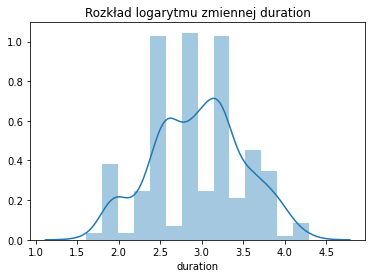

In [107]:
wr.filterwarnings("ignore")

gcd_log_dur = sns.distplot(np.log1p(gcd_test['duration']))
gcd_log_dur.set_title('Rozkład logarytmu zmiennej duration')

plt.show()

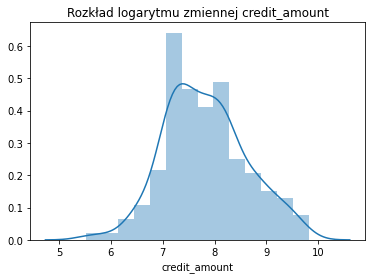

In [108]:
gcd_log_cre = sns.distplot(np.log1p(gcd_test['credit_amount']))
gcd_log_cre.set_title('Rozkład logarytmu zmiennej credit_amount')

plt.show()

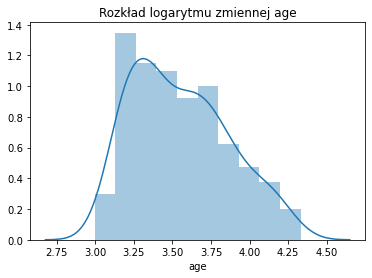

In [109]:
gcd_log_age = sns.distplot(np.log1p(gcd_test['age']))
gcd_log_age.set_title('Rozkład logarytmu zmiennej age')

plt.show()

Rzeczywiście rozkłady uległy poprawie, zwłaszcza zmiennych *duration* i *credit_amount*.

## Podsumowanie
Eksplorację danych uznajemy za poprawną. Dokładnie sprawdzono braki danych, poprawnie przeprowadzono encoding, wzięto pod uwagę outliery oraz prawie wszystkie wnioski sprawdziły się dla walidacyjnej próbki danych. Naszym zdaniem ewentualne niezgodności wyniknęły ze złego doboru wykresu, a co za tym idzie utrudnionego odczytu danych.